# Graphing tweets to @realDonaldTrump by day in early January 2021

We're using a Jupyter Notebook via the [Anaconda distribution](https://www.anaconda.com/), and we'll need to only import the following:

In [2]:
import datetime
import pandas as pd

We'll create a DataFrame to work with from `202101-dates.txt`. This file is a derivative of the [Tweets to Donald Trump (@realDonaldTrump)](https://doi.org/10.5683/SP/8BAVQM) dataset. It can be created with [`jq`](https://stedolan.github.io/jq/) with the following command:

```
$ cat 202101-tweets.jsonl | jq -r .created_at > 202101-dates.txt
```

It is also included in the repo in the `data` directory.

In [4]:
tweet_times = pd.read_csv(
    "data/202101-dates.txt",
    names=["utc_timestamp"],
    header=None,
    parse_dates=["utc_timestamp"],
)

Let's take a look at the DataFrame:

In [5]:
tweet_times

,utc_timestamp
0,2021-01-01 05:00:52+00:00
1,2021-01-01 05:00:52+00:00
2,2021-01-01 05:00:51+00:00
3,2021-01-01 05:00:51+00:00
4,2021-01-01 05:00:51+00:00
...,...
5455425,2021-01-07 08:59:12+00:00
5455426,2021-01-07 08:53:59+00:00
5455427,2021-01-07 08:36:53+00:00
5455428,2021-01-07 08:24:48+00:00


Next, we'll add a new column to our DataFrame which converts the `utc_timestamp` column to the date it corresponds to.

In [7]:
tweet_times["days"] = tweet_times["utc_timestamp"].apply(
    lambda tweet_times: datetime.datetime(
        year=tweet_times.year, month=tweet_times.month, day=tweet_times.day
    )
)

Let's take a look at the DataFrame again to see the new column:

In [8]:
tweet_times

,utc_timestamp,days
0,2021-01-01 05:00:52+00:00,2021-01-01
1,2021-01-01 05:00:52+00:00,2021-01-01
2,2021-01-01 05:00:51+00:00,2021-01-01
3,2021-01-01 05:00:51+00:00,2021-01-01
4,2021-01-01 05:00:51+00:00,2021-01-01
...,...,...
5455425,2021-01-07 08:59:12+00:00,2021-01-07
5455426,2021-01-07 08:53:59+00:00,2021-01-07
5455427,2021-01-07 08:36:53+00:00,2021-01-07
5455428,2021-01-07 08:24:48+00:00,2021-01-07


Finally, let's create a bar chart, and make it look nice. We'll first format the x-axis dates, then create the chart, then add a title, labels, and the formated x-axis dates.

[Text(0, 0, 'Dec 25'),
 Text(0, 0, 'Dec 26'),
 Text(0, 0, 'Dec 27'),
 Text(0, 0, 'Dec 28'),
 Text(0, 0, 'Dec 29'),
 Text(0, 0, 'Dec 30'),
 Text(0, 0, 'Dec 31'),
 Text(0, 0, 'Jan 01'),
 Text(0, 0, 'Jan 02'),
 Text(0, 0, 'Jan 03'),
 Text(0, 0, 'Jan 04'),
 Text(0, 0, 'Jan 05'),
 Text(0, 0, 'Jan 06'),
 Text(0, 0, 'Jan 07'),
 Text(0, 0, 'Jan 08'),
 Text(0, 0, 'Jan 09'),
 Text(0, 0, 'Jan 10'),
 Text(0, 0, 'Jan 11'),
 Text(0, 0, 'Jan 12'),
 Text(0, 0, 'Jan 13'),
 Text(0, 0, 'Jan 14')]

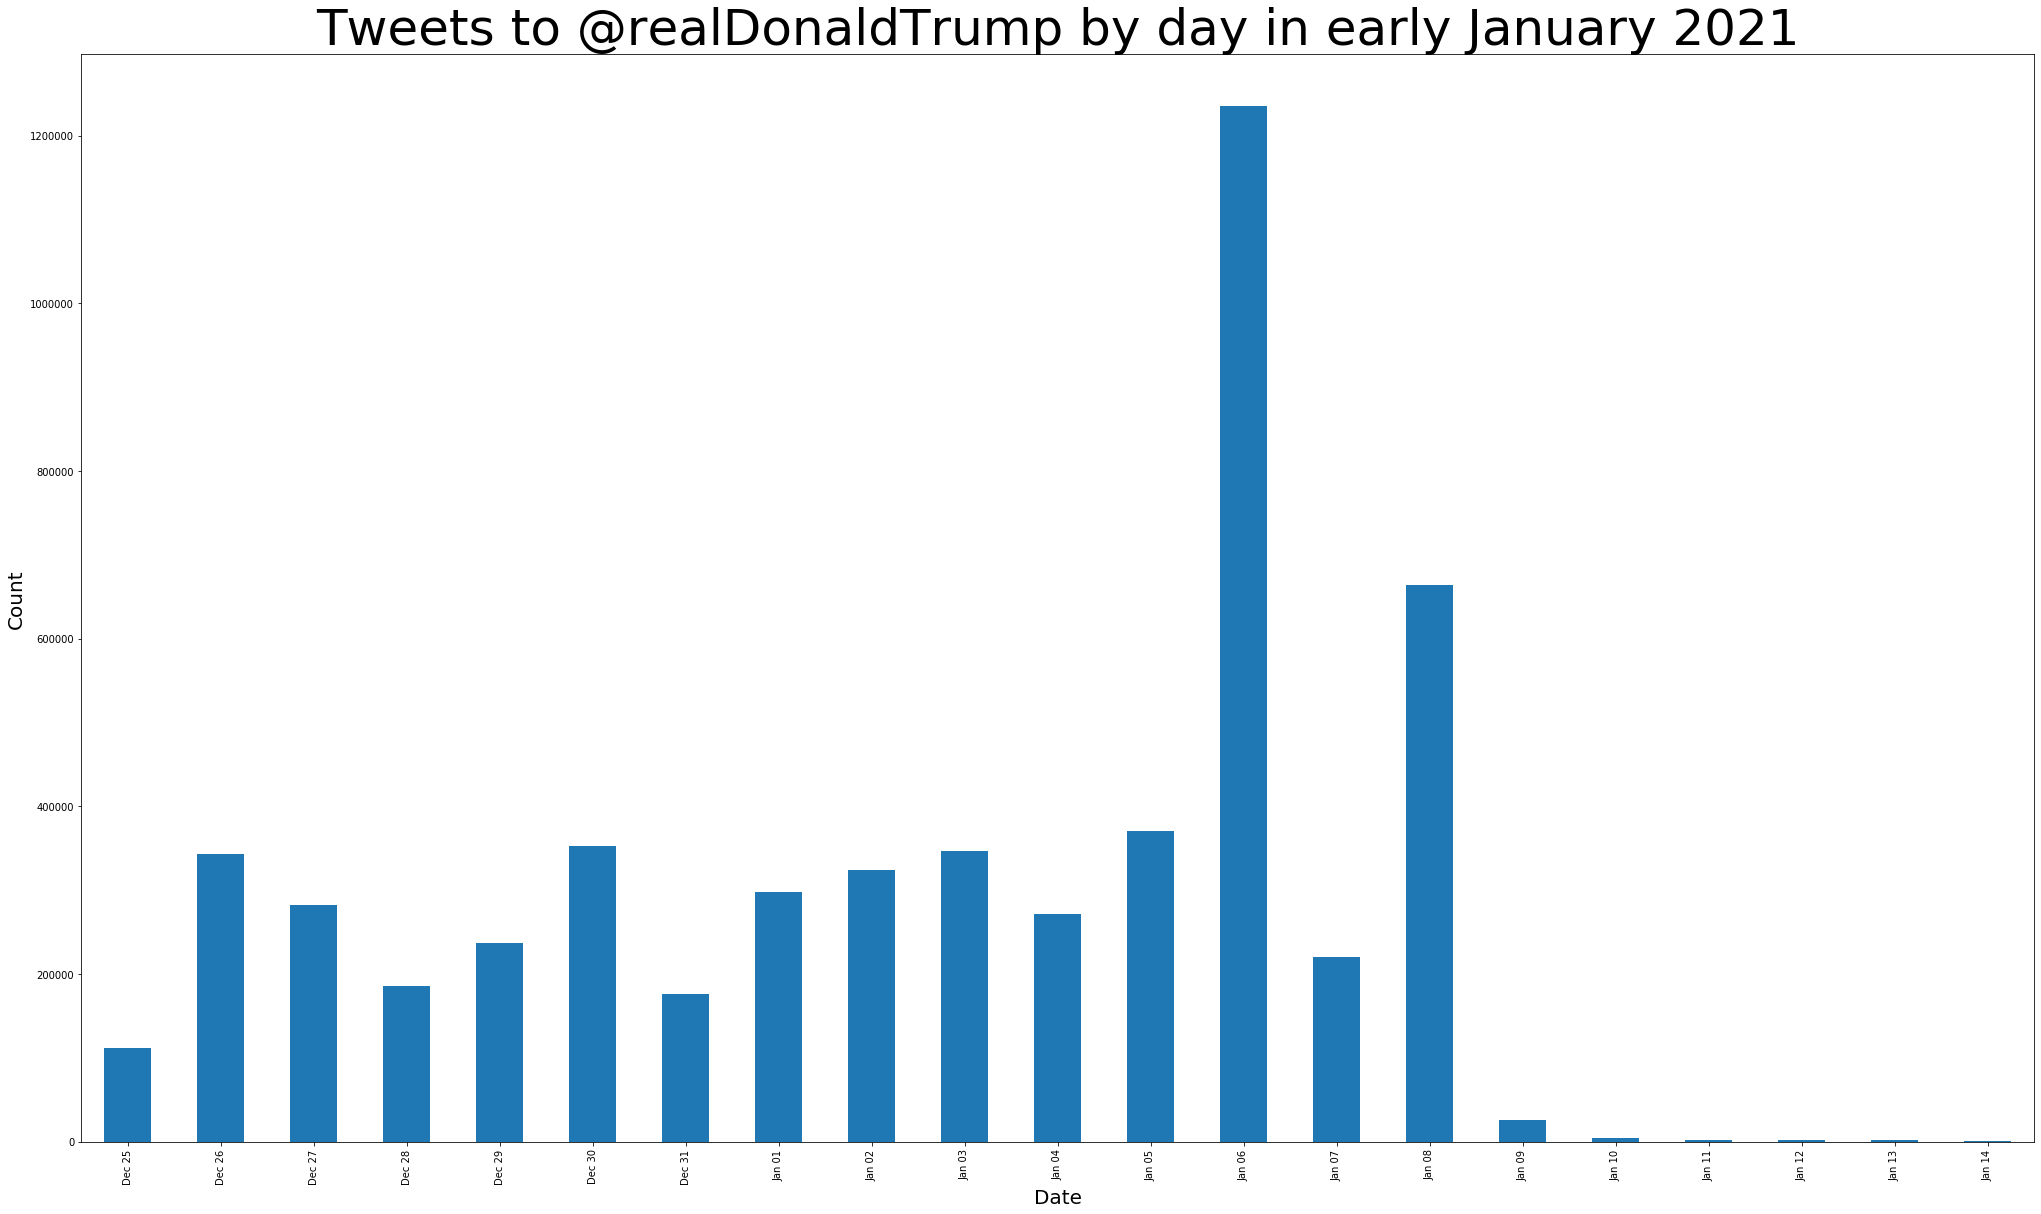

In [13]:
nice_xaxis_labels = lambda x: datetime.datetime.strptime(
    x, "%Y-%m-%d %H:%M:%S"
).strftime("%b %d")

chart = (
    tweet_times.groupby(tweet_times["days"])
    .count()
    .plot.bar(figsize=(35, 20), legend=False)
)

chart.set_title("Tweets to @realDonaldTrump by day in early January 2021", fontsize=50)
chart.set_xlabel("Date", fontsize=20)
chart.set_ylabel("Count", fontsize=20)
chart.set_xticklabels(
    [nice_xaxis_labels(x.get_text()) for x in chart.get_xticklabels()]
)